## Load and Explore the Data
First, let's load and explore the datasets to understand their structure and contents

In [24]:
import pandas as pd

In [25]:
# Load weather data
weather_data = pd.read_csv('/home/tina/Self_Projects/lagos_weeather_data_2002_to_2024 (1).csv')

# Display the first few rows of the dataset
print("Initial Weather Data:")
weather_data.head()
weather_data.tail()

Initial Weather Data:


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
8671,Lagos,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,...,30.0,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5",NaN,NaN
8672,Lagos,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,...,30.0,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999",NaN,NaN
8673,Lagos,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,...,30.0,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote",NaN,NaN
8674,Lagos,2024-07-02,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,...,30.0,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",NaN,NaN
8675,Lagos,2024-07-03,27.1,24.0,25.4,29.9,24.0,25.6,24.2,93.1,...,10.0,2024-07-03T06:36:15,2024-07-03T19:05:27,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",NaN,NaN


## Data Cleaning
Now, let's apply various cleaning techniques to these datasets.

In [26]:
import pandas as pd
import numpy as np

# Function to clean the datasets
def clean_data(df, date_column=None, numeric_columns=None):
    # Convert date columns to datetime if specified
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    
    # Fill missing values
    df.fillna(method='ffill', inplace=True)  # Forward fill
    df.fillna(method='bfill', inplace=True)  # Backward fill
    
    # Drop rows with remaining missing values
    df.dropna(inplace=True)
    
    # Normalize numerical columns if specified
    if numeric_columns:
        df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()
    
    return df

# Check column names and clean the dataset

# Weather data has 'date time' column
print("Weather Data Columns:", weather_data.columns)
weather_data_clean = clean_data(weather_data, date_column='datetime', numeric_columns=['temp', 'humidity', 'sealevelpressure', 'windspeed', 'precip'])


print("\nCleaned Weather Data:")
weather_data_clean.head()
weather_data_clean.info()

print("Cleaned data saved successfully.")

Weather Data Columns: Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

Cleaned Weather Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              8676 non-null   object        
 1   datetime          8676 non-null   datetime64[ns]
 2   tempmax           8676 non-null   float64       
 3   tempmin           8676 non-null   float64       
 4   te

/tmp/ipykernel_1118/1583273958.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
/tmp/ipykernel_1118/1583273958.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


In [27]:
weather_data_clean.dtypes

name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
precipcover                float64
preciptype                  object
snow                       float64
snowdepth                  float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                    float64
severerisk                 float64
sunrise                     object
sunset                      object
moonphase           

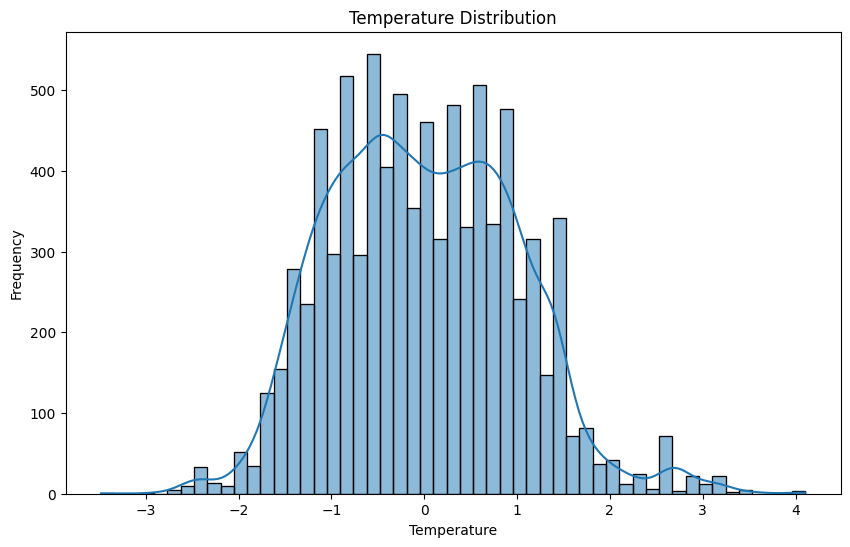

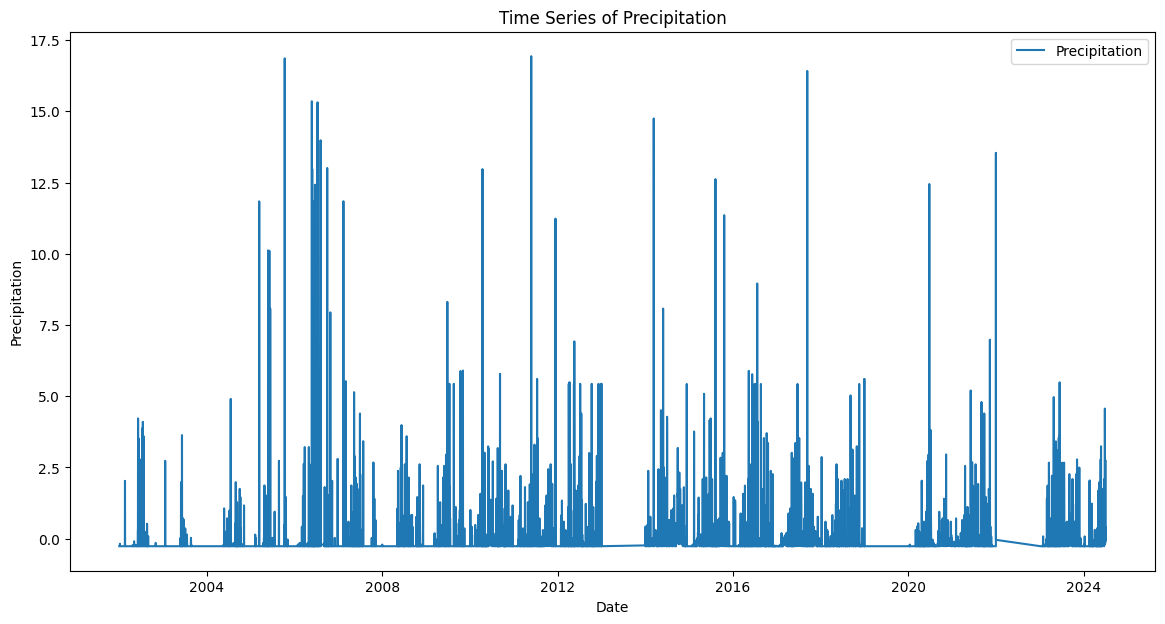

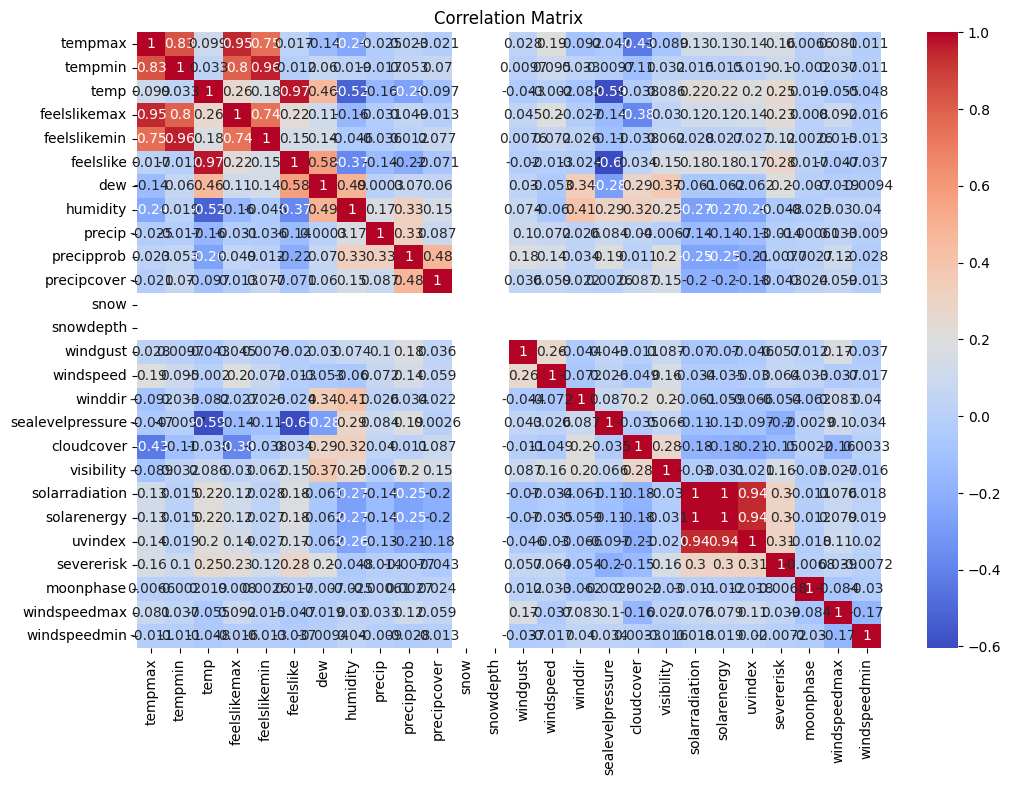

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(weather_data_clean['temp'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Plotting the time series of precipitation
plt.figure(figsize=(14, 7))
plt.plot(weather_data_clean['datetime'], weather_data_clean['precip'], label='Precipitation')
plt.title('Time Series of Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(weather_data_clean.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

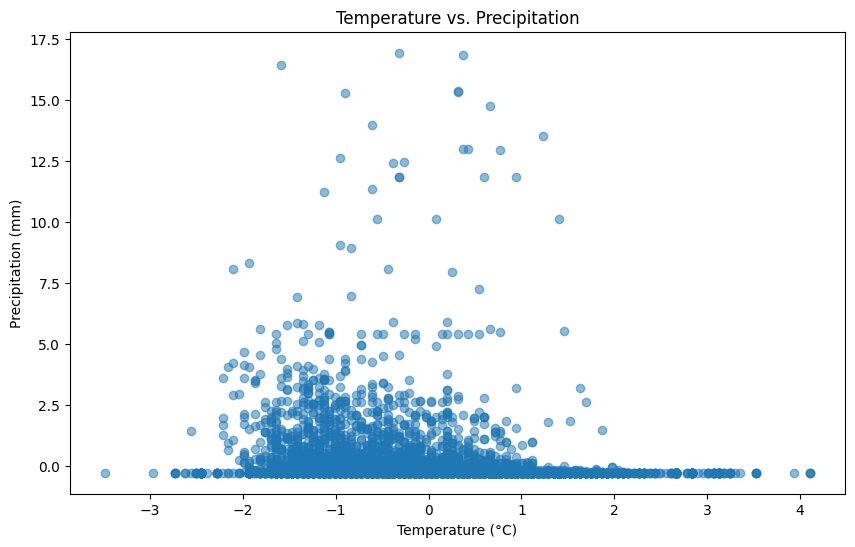

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['temp'], weather_data['precip'], alpha=0.5)
plt.title('Temperature vs. Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.savefig('temperature_vs_precipitation.png')
plt.show()

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Convert 'date' column to datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Extract year, month, and day from date for possible features
weather_data['year'] = weather_data['datetime'].dt.year
weather_data['month'] = weather_data['datetime'].dt.month
weather_data['day'] = weather_data['datetime'].dt.day

# Identify categorical columns
categorical_columns = weather_data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_columns}")

# One-hot encode categorical columns
weather_data = pd.get_dummies(weather_data, columns=categorical_columns)

# Create lag features for precipitation
weather_data['precip_lag1'] = weather_data['precip'].shift(1)
weather_data['precip_lag2'] = weather_data['precip'].shift(2)
weather_data['precip_lag3'] = weather_data['precip'].shift(3)

# Fill any remaining missing values after creating lag features
weather_data.fillna(method='ffill', inplace=True)
weather_data.fillna(method='bfill', inplace=True)

# Display the new features
print("Weather Data with New Features:")
print(weather_data.head())

Categorical Columns: Index(['name', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description',
       'icon', 'stations'],
      dtype='object')
Weather Data with New Features:
    datetime  tempmax  tempmin      temp  feelslikemax  feelslikemin  \
0 2002-01-01     28.6     25.6 -0.148222          33.8          25.6   
1 2002-01-02     33.1     26.1  0.886812          39.4          26.1   
2 2002-01-03     34.1     25.1  0.944314          35.2          25.1   
3 2002-01-04     33.1     33.1  3.244391          39.4          39.4   
4 2002-01-05     31.1     25.6  0.484299          37.4          25.6   

   feelslike   dew  humidity    precip  ...  \
0       30.7  25.2  0.777978 -0.264254  ...   
1       33.8  25.1 -0.322232 -0.264254  ...   
2       31.7  23.2 -1.113847 -0.264254  ...   
3       39.4  24.1 -3.166677 -0.264254  ...   
4       33.1  25.4  0.281541 -0.264254  ...   

   stations_VRJU8,DNMM,remote,65201099999  \
0                                   False   
1           

/tmp/ipykernel_1118/2994666568.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_1118/2994666568.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data.fillna(method='bfill', inplace=True)


## Prepare Data for Modeling
First, let's combine the features into a single DataFrame. We will assume that the target variable flood_occurrence is already defined in one of your datasets (e.g., in the flood_areas_data_clean dataset).

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# we have a target variable 'flood_occurrence' (1 for flood, 0 for no flood)
# we create a synthetic 'flood_occurrence' based on precipitation thresholds
weather_data['flood_occurrence'] = (weather_data['precip'] > weather_data['precip'].quantile(0.95)).astype(int)

# Define features (X) and target (y)
X = weather_data.drop(columns=['datetime', 'flood_occurrence'])
y = weather_data['flood_occurrence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}")

Model Evaluation:
Accuracy: 0.96
Precision: 1.00
Recall: 0.24
F1 Score: 0.38


## Prediction and Reporting
Finally, use the trained model to predict future flood occurrences.

In [39]:
# Predict the probability of a flood occurrence for the next period
future_data = weather_data.tail(8).copy()
future_data['datetime'] = future_data['datetime'] + pd.DateOffset(days=7)

# Drop unnecessary columns
future_data = future_data.drop(columns=['datetime', 'flood_occurrence'])

# Make predictions
future_prob = rf_model.predict_proba(future_data)[:, 1]

# Report the result
print(f"Probability of flood occurrence on {weather_data['datetime'].iloc[-1] + pd.DateOffset(days=1)}: {future_prob[0]:.2f}")

Probability of flood occurrence on 2024-07-04 00:00:00: 0.72


In [40]:
# After preprocessing the training data
feature_names = X.columns

# Save the feature names to a file
import joblib
joblib.dump(feature_names, 'Flood_likely_hood_in_lagos')

['Flood_likely_hood_in_lagos']